<a href="https://colab.research.google.com/github/Vinicius-Tineli-Paiva/predictive-games-analytics/blob/main/preProcessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # Notebook 01: Pré-Processamento e Feature Engineering

 **Objetivo**: Realizar limpeza, tratamento, análise exploratória e criação de features genéricas que serão utilizadas por todos os modelos de Target.

 **Outputs**:
 - `data/processed/dados_processados.parquet` - Dados limpos e processados
 - `data/processed/train_indices.csv` - Índices para treino
 - `data/processed/test_indices.csv` - Índices para teste
 - `results/eda_report.html` - Relatório exploratório

In [ ]:
# 1. Configuração e Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Configurar precisão de exibição
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# Criar estrutura de pastas
Path('data/raw').mkdir(parents=True, exist_ok=True)
Path('data/processed').mkdir(parents=True, exist_ok=True)
Path('results').mkdir(parents=True, exist_ok=True)
Path('models').mkdir(parents=True, exist_ok=True)

print("✅ Ambiente configurado com sucesso!")
print(f"📅 Data de execução: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Ambiente configurado com sucesso!
📅 Data de execução: 2025-10-22 17:16:00


In [ ]:
# 2. Carregamento dos Dados
# Carregar dados brutos
df_raw = pd.read_excel('JogadoresV2.xlsx', sheet_name='Session Activities')

print(f"📊 Dimensões dos dados brutos: {df_raw.shape}")
print(f"   - Linhas (jogadores): {df_raw.shape[0]}")
print(f"   - Colunas (features): {df_raw.shape[1]}")

# Visualizar primeiras linhas
display(df_raw.head(3))


📊 Dimensões dos dados brutos: (173, 114)
   - Linhas (jogadores): 173
   - Colunas (features): 114


,Código de Acesso,F0101,F0102,F0103,F0104,F0201,Cor0202,F0203,Cor0204,F0205,Cor0206,F0207,Cor0208,Cor0209Outro,L0210 (não likert),F0299 - Explicação Tempo,Q0401,Q0402,Q0403,T0404,Q0405,Q0406,Q0407,T0408,Q0409,Q0410,Q0411,T0412,Q0413,Q0414,Q0415,T0498,T0499 - Explicação Tempo,P01,T01,P02,T02,P03,T03,P05,T05,P09,T09,P12,T12,P15,T15,PTempoTotal,PTempoTotalExpl,QtdComida,QtdPessoas,QtdSom,GameTempoTotal,QtdDormir,QtdHorasDormi,QtdHorasSono,Acordar,F0705,F0706,F0707,F0708,F0709,F0710,F0711,F0712,F0713,F1101,F1102,F1103,F1104,F1105,Tempo1106,F1107,Tempo1108,F1109,Tempo1110,F1111,Tempo1112,TempoTotal11,T1199Expl,Q1201,Q1202,Q1203,T1204,T1205Expl,Q1206,Q1207,Q1208,Q1209,T1210Expl,P04,P08,P10,P12.1,P02.1,P03.1,P07,P09.1,P13,T04,T08,T10,T12.1,T02.1,T03.1,T07,T09.1,T13,TempoTotal,TempoTotalExpl,Data/Hora Último,Target1,Target2,Target3
0,JDOLSME75EKO,1,0,0.471,3,1,FFFFFF,8,FFFFFF,2,FFFFFF,FFFFFF,FFFFFF,FFFFFF,0,NaN,10,1,9,69.602,5,4,9,47.394,8,1,9,0.000,23,6,27,116.996,10.0,2.0,10.982,2.0,15.163,2.0,9.234,2.0,9.016,1.0,21.461,4.0,6.286,1.0,64.242,136.384,NaN,2,1,1,20.782,1,1,2,3,4,3,1,1,4,3,3,3,1,1,8.416,3,4.527,2,8.789,2,8.055,2,3.509,3,2.432,35.728,NaN,0.0,0.0,24.0,65.946,NaN,0.0,0.0,24.0,110.471,NaN,5.0,5.0,5.0,5.0,5.0,1.0,1.0,5.0,1.0,5.965,4.424,6.867,6.150,5.515,8.200,7.582,5.250,5.567,79.517,NaN,12/09/2025 11:42:59,26.923,19.048,54.286
1,CM3DF3GCO8KV,3,1,0.471,3,2,BE845A,3,5B2600,2,FFFFFF,FFFFFF,262626,474747,0,NaN,2,1,17,10.983,2,1,12,7.450,1,2,16,17.116,5,4,45,35.549,NaN,2.0,34.999,1.0,6.649,4.0,9.550,4.0,20.901,1.0,10.217,1.0,9.881,1.0,23.115,115.312,NaN,2,1,3,25.732,2,2,2,3,3,3,3,3,3,3,2,2,3,2,7.234,3,6.197,2,1.900,4,4.800,2,3.605,4,7.124,30.860,NaN,2.0,0.0,24.0,141.180,NaN,7.0,0.0,24.0,203.626,NaN,5.0,5.0,1.0,5.0,5.0,1.0,1.0,5.0,5.0,5.436,3.090,7.055,1.466,3.562,11.683,6.514,15.820,6.274,84.976,NaN,12/09/2025 11:42:13,53.846,47.619,71.429
2,CX7MQGTPWBVF,3,0,0.471,2,5,FFFFFF,8,FFFFFF,2,FFFFFF,FFFFFF,FFFFFF,FFFFFF,5,NaN,3,1,16,24.565,3,0,11,6.867,3,0,14,8.749,9,1,41,40.181,NaN,3.0,3.866,3.0,7.183,4.0,7.533,4.0,7.766,4.0,8.066,4.0,6.617,4.0,6.916,47.947,NaN,3,2,3,34.665,2,3,2,5,5,5,5,5,5,5,5,4,1,4,12.712,4,2.479,4,3.098,4,2.798,4,1.732,4,3.833,26.652,NaN,2.0,0.0,24.0,64.513,NaN,2.0,0.0,24.0,145.544,NaN,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.900,4.500,7.466,6.433,7.766,7.216,6.683,7.849,6.566,82.946,NaN,12/09/2025 11:40:41,11.538,4.762,77.143


In [ ]:
# 3. Limpeza Inicial dos Dados
# 3.1 Remover colunas vazias ou irrelevantes
print("🧹 Removendo colunas vazias e irrelevantes...")

# Remover colunas __EMPTY que são geradas pelo Excel
cols_to_drop = [col for col in df_raw.columns if '__EMPTY' in str(col)]
df = df_raw.drop(columns=cols_to_drop, errors='ignore')

print(f"   ✓ Removidas {len(cols_to_drop)} colunas vazias")
print(f"   ✓ Dimensões após limpeza: {df.shape}")

# 3.2 Identificar e separar tipos de colunas (baseado no dicionário de dados)
print("\n📋 Identificando e classificando tipos de colunas...")

# ========== IDENTIFICADORES E TARGETS ==========
col_id = ['Código de Acesso']
col_datetime = ['Data/Hora Último']
col_targets = ['Target1', 'Target2', 'Target3']

# ========== COLUNAS DE TEXTO (PRIORIDADE MÁXIMA) ==========
# IMPORTANTE: Identificar ANTES das colunas de tempo para evitar conflitos
col_texto = []

# 1. Colunas de cores (hexadecimal)
col_texto.extend([col for col in df.columns if 'Cor' in col or col.startswith('Cor')])

# 2. Colunas de explicação (sempre texto, mesmo com 'T' no nome)
col_texto.extend([col for col in df.columns if 'Expl' in col or 'Explicação' in col])

# 3. Outras colunas de texto específicas
col_texto.extend([col for col in df.columns if 'Acordar' in col])

# 4. Colunas com hífen (geralmente são texto explicativo)
col_texto.extend([col for col in df.columns if ' - ' in col])

# Remover duplicatas
col_texto = list(set(col_texto))

# ========== COLUNAS LIKERT (Escalas de Opinião 1-5) ==========
col_likert = []

# Seção F07XX (todas são Likert)
col_likert.extend([col for col in df.columns if col.startswith('F07')])

# Seção F11XX (apenas as que não são Tempo)
f11_cols = [col for col in df.columns if col.startswith('F11')]
col_likert.extend([col for col in f11_cols if 'Tempo' not in col and col not in col_texto])

# Remover duplicatas
col_likert = list(set(col_likert))

# ========== COLUNAS DE TEMPO (em segundos) ==========
# IMPORTANTE: Excluir colunas de texto já identificadas
col_tempo = []

# 1. Colunas que começam com 'T' e são números (TXX)
t_cols = [col for col in df.columns if col.startswith('T') and col not in col_texto]
col_tempo.extend(t_cols)

# 2. Colunas que contêm 'Tempo' mas não são explicações
tempo_cols = [col for col in df.columns if 'Tempo' in col and col not in col_texto]
col_tempo.extend(tempo_cols)

# Remover duplicatas
col_tempo = list(set(col_tempo))

# ========== COLUNAS NÃO-LIKERT (Demográficas, Quantitativas, etc.) ==========
# Tudo que sobrou
todas_classificadas = col_id + col_datetime + col_targets + col_texto + col_likert + col_tempo
col_nao_likert = [col for col in df.columns if col not in todas_classificadas]

# ========== RESUMO DA CLASSIFICAÇÃO ==========
print(f"""
╔══════════════════════════════════════════════════════════════╗
║               RESUMO DA CLASSIFICAÇÃO DE COLUNAS              ║
╠══════════════════════════════════════════════════════════════╣
║  Categoria          │  Quantidade  │  Exemplos                ║
╠═════════════════════╪══════════════╪═════════════════════════╣
║  Identificação      │  {len(col_id):^12} │  {col_id[0] if col_id else 'N/A':^23} ║
║  DateTime           │  {len(col_datetime):^12} │  {col_datetime[0] if col_datetime else 'N/A':^23} ║
║  Targets            │  {len(col_targets):^12} │  {', '.join(col_targets[:2]):^23} ║
║  Texto              │  {len(col_texto):^12} │  {col_texto[0][:23] if col_texto else 'N/A':^23} ║
║  Likert             │  {len(col_likert):^12} │  {col_likert[0] if col_likert else 'N/A':^23} ║
║  Tempo              │  {len(col_tempo):^12} │  {col_tempo[0] if col_tempo else 'N/A':^23} ║
║  NãoLikert          │  {len(col_nao_likert):^12} │  {col_nao_likert[0] if col_nao_likert else 'N/A':^23} ║
╠═════════════════════╧══════════════╧═════════════════════════╣
║  TOTAL              │  {len(df.columns):^47} ║
╚══════════════════════════════════════════════════════════════╝
""")

# Validação: verificar se todas as colunas foram classificadas
total_classificadas = len(todas_classificadas)
if total_classificadas != len(df.columns):
    print(f"⚠️  ATENÇÃO: {len(df.columns) - total_classificadas} colunas não classificadas!")
else:
    print("✅ Todas as colunas foram classificadas corretamente!")

# %%
# 3.3 Converter tipos de dados corretamente
print("\n🔄 Convertendo tipos de dados de forma segura...\n")

conversoes_realizadas = {'datetime': 0, 'numeric': 0, 'string': 0}

# ========== CONVERTER DATA/HORA ==========
if 'Data/Hora Último' in df.columns:
    df['Data/Hora Último'] = pd.to_datetime(df['Data/Hora Último'], errors='coerce')
    conversoes_realizadas['datetime'] += 1
    print(f"   ✓ DateTime: 'Data/Hora Último' → pd.datetime")

# ========== CONVERTER COLUNAS NUMÉRICAS ==========
print("\n   🔢 Convertendo colunas numéricas...")
colunas_numericas = col_likert + col_tempo + col_nao_likert + col_targets

for col in colunas_numericas:
    if col in df.columns:
        # Verificar se a coluna já não foi convertida em outra categoria
        if col not in col_texto:
            df[col] = pd.to_numeric(df[col], errors='coerce')
            conversoes_realizadas['numeric'] += 1

print(f"      → {conversoes_realizadas['numeric']} colunas convertidas para numérico")

# ========== GARANTIR QUE COLUNAS DE TEXTO SEJAM STRINGS ==========
print("\n   📝 Convertendo colunas de texto...")

for col in col_texto:
    if col in df.columns:
        # Converter para string, substituindo NaN por 'N/A'
        df[col] = df[col].fillna('N/A').astype(str)
        conversoes_realizadas['string'] += 1

print(f"      → {conversoes_realizadas['string']} colunas convertidas para string")

# ========== VERIFICAÇÃO FINAL DE TIPOS ==========
print("\n   🔍 Verificando tipos de dados finais...")

tipos_finais = df.dtypes.value_counts()
print("\n   Distribuição de tipos:")
for tipo, count in tipos_finais.items():
    print(f"      • {str(tipo):15} : {count:3} colunas")

print("\n✅ Conversão de tipos de dados concluída com sucesso!")


🧹 Removendo colunas vazias e irrelevantes...
   ✓ Removidas 0 colunas vazias
   ✓ Dimensões após limpeza: (173, 114)

📋 Identificando e classificando tipos de colunas...

╔══════════════════════════════════════════════════════════════╗
║               RESUMO DA CLASSIFICAÇÃO DE COLUNAS              ║
╠══════════════════════════════════════════════════════════════╣
║  Categoria          │  Quantidade  │  Exemplos                ║
╠═════════════════════╪══════════════╪═════════════════════════╣
║  Identificação      │       1       │     Código de Acesso     ║
║  DateTime           │       1       │     Data/Hora Último     ║
║  Targets            │       3       │     Target1, Target2     ║
║  Texto              │       13      │      TempoTotalExpl      ║
║  Likert             │       17      │           F1101          ║
║  Tempo              │       32      │          Target3         ║
║  NãoLikert          │       50      │           F0101          ║
╠═════════════════════╧══════════

In [ ]:
# 4. Tratamento de Valores Especiais
# 4.1 Análise de valores especiais
print("🔍 Analisando valores especiais...\n")

# Contar valores especiais por tipo
special_values = {
    'N/A': (df == 'N/A').sum().sum(),
    '-1 ou -1.0': ((df == -1) | (df == '-1') | (df == -1.0) | (df == '-1.0')).sum().sum(),
    'Valores nulos': df.isnull().sum().sum()
}

for key, value in special_values.items():
    print(f"   • {key}: {value} ocorrências")

# 4.2 Substituir valores especiais por NaN
print("\n🔧 Tratando valores especiais...")

# Substituir 'N/A' por NaN
df = df.replace('N/A', np.nan)

# Substituir -1, -1.0, '00', '01', '02', etc. por NaN em colunas numéricas
for col in col_likert + col_tempo + col_nao_likert:
    if col in df.columns:
        # Substituir -1 e variações por NaN
        df.loc[df[col] == -1, col] = np.nan
        df.loc[df[col] == -1.0, col] = np.nan

        # Substituir códigos de status '00', '01', '02', '10', '11', '12' por NaN se aplicável
        if df[col].dtype == 'object':
            df.loc[df[col].isin(['00', '01', '02', '10', '11', '12']), col] = np.nan
            df[col] = pd.to_numeric(df[col], errors='coerce')

print("   ✓ Valores especiais tratados")

# 4.3 Análise de missing values por coluna
print("\n📊 Missing values por categoria de coluna:")

def calc_missing_pct(cols):
    """Calcula percentual de missing values"""
    cols_in_df = [c for c in cols if c in df.columns]
    if not cols_in_df:
        return 0
    return df[cols_in_df].isnull().sum().sum() / (len(cols_in_df) * len(df)) * 100

missing_by_type = {
    'Likert': calc_missing_pct(col_likert),
    'Tempo': calc_missing_pct(col_tempo),
    'NãoLikert': calc_missing_pct(col_nao_likert),
    'Texto': calc_missing_pct(col_texto),
    'Targets': calc_missing_pct(col_targets)
}

for cat, pct in missing_by_type.items():
    print(f"   • {cat}: {pct:.2f}%")

🔍 Analisando valores especiais...

   • N/A: 1155 ocorrências
   • -1 ou -1.0: 71 ocorrências
   • Valores nulos: 306 ocorrências

🔧 Tratando valores especiais...
   ✓ Valores especiais tratados

📊 Missing values por categoria de coluna:
   • Likert: 0.00%
   • Tempo: 1.41%
   • NãoLikert: 2.99%
   • Texto: 51.36%
   • Targets: 0.00%


🎯 Estatísticas dos Targets:



,Target1,Target2,Target3
count,173.000,173.000,173.000
mean,33.796,45.775,61.071
std,23.744,27.897,22.421
min,0.000,0.000,0.000
25%,15.385,23.810,48.571
50%,26.923,47.619,62.857
75%,46.700,66.667,80.000
max,100.000,100.000,100.000


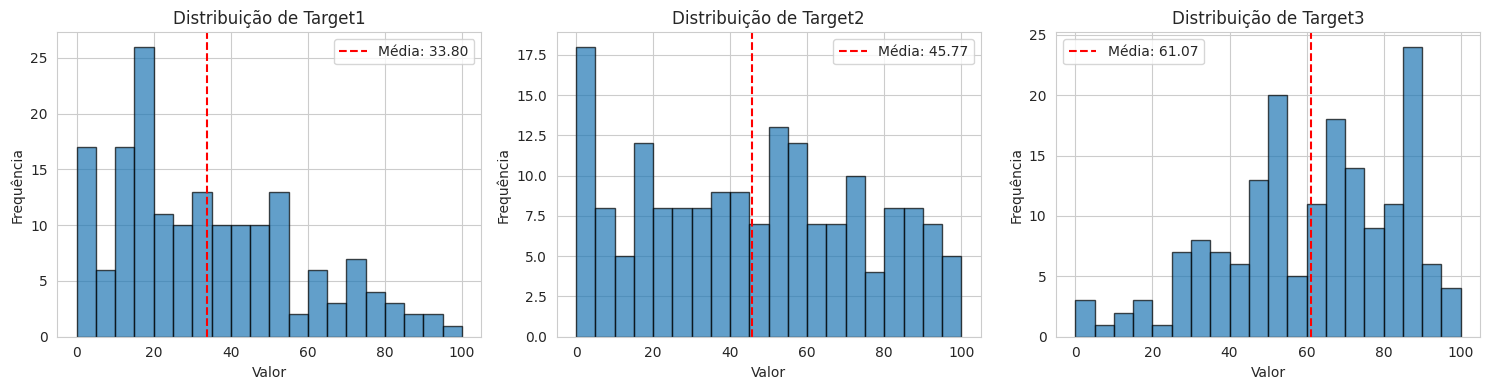

💾 Gráfico salvo em: results/target_distributions.png


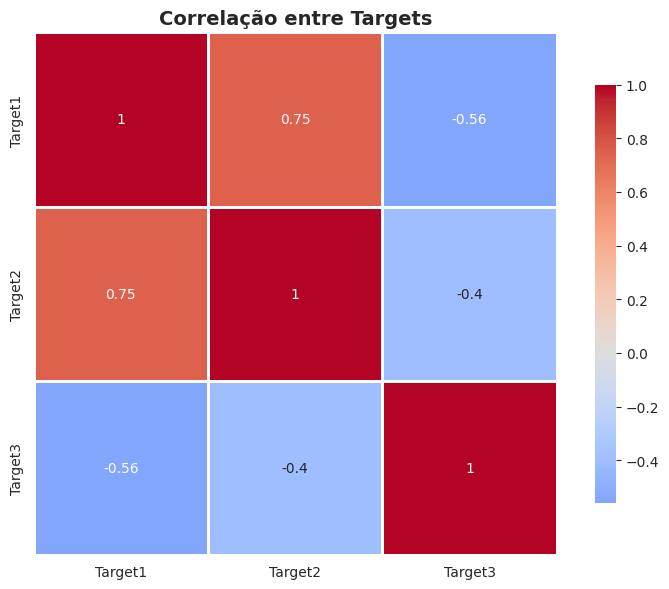

💾 Gráfico salvo em: results/target_correlation.png

👥 Análise Demográfica:

Distribuição de Gênero (F0101):
F0101
0.0    44
1.0    58
2.0     3
3.0    55
4.0    11
5.0     2
Name: count, dtype: int64

Distribuição Binária (F0102):
F0102
0.0    109
1.0     61
2.0      1
3.0      2
Name: count, dtype: int64

Idade (anos):
   Média: 67.2 anos
   Min: 62.1 anos
   Max: 78.5 anos

Distribuição de Categoria (F0104):
F0104
0.0    12
1.0    26
2.0    46
3.0    34
4.0    51
5.0     3
6.0     1
Name: count, dtype: int64


In [ ]:
# 5. Análise Exploratória de Dados (EDA)
# 5.1 Estatísticas descritivas dos Targets
print("🎯 Estatísticas dos Targets:\n")
display(df[col_targets].describe())

# 5.2 Visualização da distribuição dos Targets
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, target in enumerate(col_targets):
    axes[idx].hist(df[target].dropna(), bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribuição de {target}')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frequência')
    axes[idx].axvline(df[target].mean(), color='red', linestyle='--',
                      label=f'Média: {df[target].mean():.2f}')
    axes[idx].legend()

plt.tight_layout()
plt.savefig('results/target_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico salvo em: results/target_distributions.png")

# 5.3 Correlação entre os Targets
target_corr = df[col_targets].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlação entre Targets', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('results/target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("💾 Gráfico salvo em: results/target_correlation.png")

# 5.4 Análise de dados demográficos
print("\n👥 Análise Demográfica:\n")

# F0101 - Gênero (0-5)
if 'F0101' in df.columns:
    print("Distribuição de Gênero (F0101):")
    print(df['F0101'].value_counts().sort_index())
    print()

# F0102 - Binário (0/1)
if 'F0102' in df.columns:
    print("Distribuição Binária (F0102):")
    print(df['F0102'].value_counts().sort_index())
    print()

# F0103 - Idade normalizada (53-84 anos)
if 'F0103' in df.columns:
    # Desnormalizar idade (baseado na faixa 53-84)
    df['Idade_Anos'] = df['F0103'] * (84 - 53) + 53
    print(f"Idade (anos):")
    print(f"   Média: {df['Idade_Anos'].mean():.1f} anos")
    print(f"   Min: {df['Idade_Anos'].min():.1f} anos")
    print(f"   Max: {df['Idade_Anos'].max():.1f} anos")
    print()

# F0104 - Categoria numérica (0-6)
if 'F0104' in df.columns:
    print("Distribuição de Categoria (F0104):")
    print(df['F0104'].value_counts().sort_index())


In [ ]:
# 6. Feature Engineering
print("⚙️ Criando features de engenharia...\n")

# 6.1 Features Agregadas de Likert
likert_cols_valid = [col for col in col_likert if col in df.columns and df[col].notna().any()]

if likert_cols_valid:
    df['Likert_Score_Medio'] = df[likert_cols_valid].mean(axis=1)
    df['Likert_Score_Std'] = df[likert_cols_valid].std(axis=1)
    df['Likert_Score_Min'] = df[likert_cols_valid].min(axis=1)
    df['Likert_Score_Max'] = df[likert_cols_valid].max(axis=1)
    df['Likert_Missing_Count'] = df[likert_cols_valid].isnull().sum(axis=1)

    print(f"   ✓ Criadas 5 features agregadas de Likert (baseadas em {len(likert_cols_valid)} colunas)")

# 6.2 Features de Tempo
tempo_cols_valid = [col for col in col_tempo if col in df.columns and df[col].notna().any()]

if tempo_cols_valid:
    df['Tempo_Total'] = df[tempo_cols_valid].sum(axis=1)
    df['Tempo_Medio'] = df[tempo_cols_valid].mean(axis=1)
    df['Tempo_Std'] = df[tempo_cols_valid].std(axis=1)
    df['Tempo_Min'] = df[tempo_cols_valid].min(axis=1)
    df['Tempo_Max'] = df[tempo_cols_valid].max(axis=1)

    # Identificar possíveis timeouts (>300s)
    df['Tem_Timeout'] = (df[tempo_cols_valid] > 300).any(axis=1).astype(int)

    print(f"   ✓ Criadas 6 features agregadas de Tempo (baseadas em {len(tempo_cols_valid)} colunas)")

# 6.3 Features de Performance (Q04XX)
q04_cols = [col for col in df.columns if col.startswith('Q04')]

if q04_cols:
    df['Performance_Score_Total'] = df[q04_cols].sum(axis=1)
    df['Performance_Score_Medio'] = df[q04_cols].mean(axis=1)

    print(f"   ✓ Criadas 2 features de Performance (baseadas em {len(q04_cols)} colunas)")

# 6.4 Features de Perguntas P (PXX)
p_cols = [col for col in df.columns if col.startswith('P') and col[1].isdigit()]

if p_cols:
    df['Respostas_P_Media'] = df[p_cols].mean(axis=1)
    df['Respostas_P_Std'] = df[p_cols].std(axis=1)
    df['Respostas_P_Missing'] = df[p_cols].isnull().sum(axis=1)

    print(f"   ✓ Criadas 3 features de Respostas P (baseadas em {len(p_cols)} colunas)")

# 6.5 Features de Quantidade (Qtd)
qtd_cols = [col for col in df.columns if col.startswith('Qtd')]

if qtd_cols:
    df['Quantidade_Total'] = df[qtd_cols].sum(axis=1)
    df['Quantidade_Media'] = df[qtd_cols].mean(axis=1)

    print(f"   ✓ Criadas 2 features de Quantidade (baseadas em {len(qtd_cols)} colunas)")

# 6.6 Features de Razão (Ratios)
if 'QtdHorasDormi' in df.columns and 'QtdHorasSono' in df.columns:
    # Razão entre horas dormidas e horas necessárias
    df['Razao_Sono'] = df['QtdHorasDormi'] / (df['QtdHorasSono'] + 1e-6)
    print("   ✓ Criada feature 'Razao_Sono'")

if 'Q0413' in df.columns and 'Q0414' in df.columns:
    # Razão entre somas
    df['Razao_Q0413_Q0414'] = df['Q0413'] / (df['Q0414'] + 1e-6)
    print("   ✓ Criada feature 'Razao_Q0413_Q0414'")

# 6.7 Features Temporais (se Data/Hora disponível)
if 'Data/Hora Último' in df.columns:
    df['Hora_do_Dia'] = df['Data/Hora Último'].dt.hour
    df['Dia_da_Semana'] = df['Data/Hora Último'].dt.dayofweek
    df['Fim_de_Semana'] = (df['Dia_da_Semana'] >= 5).astype(int)

    print("   ✓ Criadas 3 features temporais")

# 6.8 Features de Consistência
# Desvio padrão entre grupos de perguntas similares
f07_cols = [col for col in df.columns if col.startswith('F07') and col[3:].isdigit()]
if f07_cols:
    df['Consistencia_F07'] = df[f07_cols].std(axis=1)
    print(f"   ✓ Criada feature 'Consistencia_F07' (baseada em {len(f07_cols)} colunas)")

f11_cols = [col for col in df.columns if col.startswith('F11') and col[3:].isdigit()]
if f11_cols:
    df['Consistencia_F11'] = df[f11_cols].std(axis=1)
    print(f"   ✓ Criada feature 'Consistencia_F11' (baseada em {len(f11_cols)} colunas)")

print("\n✅ Feature Engineering concluído!")
print(f"   Total de features criadas: ~20-25 novas features")
print(f"   Dimensões finais: {df.shape}")

⚙️ Criando features de engenharia...

   ✓ Criadas 5 features agregadas de Likert (baseadas em 17 colunas)
   ✓ Criadas 6 features agregadas de Tempo (baseadas em 32 colunas)
   ✓ Criadas 2 features de Performance (baseadas em 12 colunas)
   ✓ Criadas 3 features de Respostas P (baseadas em 16 colunas)
   ✓ Criadas 2 features de Quantidade (baseadas em 6 colunas)
   ✓ Criada feature 'Razao_Sono'
   ✓ Criada feature 'Razao_Q0413_Q0414'
   ✓ Criadas 3 features temporais
   ✓ Criada feature 'Consistencia_F07' (baseada em 9 colunas)
   ✓ Criada feature 'Consistencia_F11' (baseada em 8 colunas)

✅ Feature Engineering concluído!
   Total de features criadas: ~20-25 novas features
   Dimensões finais: (173, 140)


In [ ]:
# 7. Tratamento Final de Missing Values
print("🔧 Tratamento final de valores ausentes...")

# Estratégia de imputação por tipo de coluna
from sklearn.impute import SimpleImputer

# 7.1 Colunas Likert: imputar com mediana (mais robusto para escalas)
imputer_likert = SimpleImputer(strategy='median')
likert_to_impute = [col for col in col_likert if col in df.columns]
if likert_to_impute:
    df[likert_to_impute] = imputer_likert.fit_transform(df[likert_to_impute])
    print(f"   ✓ Imputadas {len(likert_to_impute)} colunas Likert (mediana)")

# 7.2 Colunas de Tempo: imputar com mediana
imputer_tempo = SimpleImputer(strategy='median')
tempo_to_impute = [col for col in col_tempo if col in df.columns]
if tempo_to_impute:
    df[tempo_to_impute] = imputer_tempo.fit_transform(df[tempo_to_impute])
    print(f"   ✓ Imputadas {len(tempo_to_impute)} colunas de Tempo (mediana)")

# 7.3 Colunas NãoLikert: imputar com mediana (geralmente contagens)
imputer_naolikert = SimpleImputer(strategy='median')
naolikert_to_impute = [col for col in col_nao_likert if col in df.columns and df[col].dtype in ['float64', 'int64']]
if naolikert_to_impute:
    df[naolikert_to_impute] = imputer_naolikert.fit_transform(df[naolikert_to_impute])
    print(f"   ✓ Imputadas {len(naolikert_to_impute)} colunas NãoLikert (mediana)")

# 7.4 Colunas de Texto: preencher com 'UNKNOWN' ou modo
texto_to_fill = [col for col in col_texto if col in df.columns]
for col in texto_to_fill:
    df[col] = df[col].fillna('UNKNOWN')
print(f"   ✓ Preenchidas {len(texto_to_fill)} colunas de Texto ('UNKNOWN')")

# Verificar se ainda há missing values
missing_after = df.isnull().sum().sum()
print(f"\n📊 Missing values após tratamento: {missing_after}")

if missing_after > 0:
    print("\nColunas que ainda têm missing values:")
    cols_with_missing = df.columns[df.isnull().any()].tolist()
    for col in cols_with_missing:
        print(f"   • {col}: {df[col].isnull().sum()} valores")

🔧 Tratamento final de valores ausentes...
   ✓ Imputadas 17 colunas Likert (mediana)
   ✓ Imputadas 32 colunas de Tempo (mediana)
   ✓ Imputadas 50 colunas NãoLikert (mediana)
   ✓ Preenchidas 13 colunas de Texto ('UNKNOWN')

📊 Missing values após tratamento: 120

Colunas que ainda têm missing values:
   • Data/Hora Último: 40 valores
   • Hora_do_Dia: 40 valores
   • Dia_da_Semana: 40 valores


In [ ]:
# 8. Separação Train/Test
print("✂️ Separando dados em treino e teste...\n")

# Definir índices de treino e teste (80/20)
# IMPORTANTE: Todos os modelos usarão o mesmo split!
train_idx, test_idx = train_test_split(
    df.index,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

print(f"   • Treino: {len(train_idx)} amostras ({len(train_idx)/len(df)*100:.1f}%)")
print(f"   • Teste: {len(test_idx)} amostras ({len(test_idx)/len(df)*100:.1f}%)")

# Salvar índices para garantir consistência entre modelos
pd.DataFrame({'train_idx': train_idx}).to_csv('data/processed/train_indices.csv', index=False)
pd.DataFrame({'test_idx': test_idx}).to_csv('data/processed/test_indices.csv', index=False)

print("\n   ✓ Índices salvos em 'data/processed/'")

✂️ Separando dados em treino e teste...

   • Treino: 138 amostras (79.8%)
   • Teste: 35 amostras (20.2%)

   ✓ Índices salvos em 'data/processed/'


In [ ]:
# 9. Exportação dos Dados Processados

print("💾 Salvando dados processados...\n")

# Salvar em formato Parquet (mais eficiente que CSV)
output_path = 'data/processed/dados_processados.parquet'

try:
    df.to_parquet(output_path, index=False, compression='snappy')
    print(f"   ✓ Dados salvos em: {output_path}")
except Exception as e:
    print(f"   ⚠️  Erro ao salvar Parquet: {e}")
    print("   🔧 Tentando corrigir tipos de dados mistos...")

    # Identificar e corrigir colunas problemáticas
    for col in df.columns:
        # Se a coluna tem tipos mistos (object com números e strings)
        if df[col].dtype == 'object':
            # Tentar converter para numérico
            df_temp = pd.to_numeric(df[col], errors='coerce')
            # Se muitos valores viraram NaN, é porque era texto mesmo
            if df_temp.isna().sum() > len(df) * 0.3:  # >30% NaN após conversão
                df[col] = df[col].astype(str)
                print(f"      → Convertida '{col}' para string")

    # Tentar salvar novamente
    df.to_parquet(output_path, index=False, compression='snappy')
    print(f"   ✓ Dados salvos em: {output_path} (após correção)")

print(f"   ✓ Tamanho do arquivo: {Path(output_path).stat().st_size / 1024:.2f} KB")
print(f"   ✓ Shape final: {df.shape}")

# %%
# Salvar também em CSV para compatibilidade (opcional)
csv_path = 'data/processed/dados_processados.csv'
df.to_csv(csv_path, index=False)
print(f"   ✓ CSV salvo em: {csv_path}")

💾 Salvando dados processados...

   ✓ Dados salvos em: data/processed/dados_processados.parquet
   ✓ Tamanho do arquivo: 141.41 KB
   ✓ Shape final: (173, 140)
   ✓ CSV salvo em: data/processed/dados_processados.csv


In [ ]:
# 10. Resumo Final e Metadados

print("\n" + "="*70)
print(" 📋 RESUMO DO PRÉ-PROCESSAMENTO ".center(70, "="))
print("="*70 + "\n")

summary = {
    'Data de Processamento': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'Total de Jogadores': len(df),
    'Total de Features': len(df.columns),
    'Features Originais': len(df_raw.columns),
    'Features Criadas': len(df.columns) - len(df_raw.columns) + len(cols_to_drop),
    'Tamanho Treino': len(train_idx),
    'Tamanho Teste': len(test_idx),
    'Missing Values (final)': df.isnull().sum().sum(),
    'Targets': ', '.join(col_targets)
}

for key, value in summary.items():
    print(f"   {key:.<50} {value}")

print("\n" + "="*70)

# Salvar metadados
metadata = {
    'timestamp': datetime.now().isoformat(),
    'n_samples': len(df),
    'n_features': len(df.columns),
    'n_features_original': len(df_raw.columns),
    'n_features_created': len(df.columns) - len(df_raw.columns) + len(cols_to_drop),
    'train_size': len(train_idx),
    'test_size': len(test_idx),
    'missing_values': int(df.isnull().sum().sum()),
    'columns': df.columns.tolist()
}

import json
with open('data/processed/metadata.json', 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)

print("\n💾 Metadados salvos em: data/processed/metadata.json")

print("\n✅ PRÉ-PROCESSAMENTO CONCLUÍDO COM SUCESSO!")
print("\n📁 Arquivos gerados:")
print("   • data/processed/dados_processados.parquet")
print("   • data/processed/dados_processados.csv")
print("   • data/processed/train_indices.csv")
print("   • data/processed/test_indices.csv")
print("   • data/processed/metadata.json")
print("   • results/target_distributions.png")
print("   • results/target_correlation.png")
print("\n🚀 Próximo passo: Execute os notebooks 02, 03 e 04 para modelar cada Target!")


=================== 📋 RESUMO DO PRÉ-PROCESSAMENTO ====================

   Data de Processamento............................. 2025-10-22 17:16:05
   Total de Jogadores................................ 173
   Total de Features................................. 140
   Features Originais................................ 114
   Features Criadas.................................. 26
   Tamanho Treino.................................... 138
   Tamanho Teste..................................... 35
   Missing Values (final)............................ 120
   Targets........................................... Target1, Target2, Target3


💾 Metadados salvos em: data/processed/metadata.json

✅ PRÉ-PROCESSAMENTO CONCLUÍDO COM SUCESSO!

📁 Arquivos gerados:
   • data/processed/dados_processados.parquet
   • data/processed/dados_processados.csv
   • data/processed/train_indices.csv
   • data/processed/test_indices.csv
   • data/processed/metadata.json
   • results/target_distributions.png
   • results/ta